In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
from time import time

In [2]:
random=np.random.rand(20000,100)
#random=np.random.randint(0,10,size=(20000,100))
df=pd.DataFrame(random*10,index=np.arange(20000), columns=np.arange(100))
print(df)

             0         1         2         3         4         5         6   \
0      7.307292  0.301551  8.997255  7.291933  5.592481  6.779717  9.708711   
1      7.558982  2.192418  2.657403  7.329240  7.551894  5.995697  7.429380   
2      5.067101  6.961141  9.194165  9.059375  9.411281  4.337521  0.963276   
3      8.058636  5.396288  3.219239  1.751945  3.084924  5.538154  4.680943   
4      7.991327  6.360624  8.221115  5.373953  0.133062  4.316539  0.067357   
...         ...       ...       ...       ...       ...       ...       ...   
19995  3.587104  3.632909  8.840988  8.490012  2.361645  4.904911  5.883067   
19996  7.083767  7.177136  7.257400  8.713539  7.738464  5.446272  6.853111   
19997  1.110291  1.221468  1.198845  8.635198  6.709634  3.148547  9.526461   
19998  7.799559  2.351965  0.323591  8.469965  6.794498  7.258066  6.324677   
19999  0.621902  6.266333  3.673302  6.676950  4.717165  1.641738  2.013810   

             7         8         9   ...        90 

In [3]:
def mse(df):
   #result=np.sqrt(sum([np.min(df,axis=0)**2,np.max(df,axis=0)**2]))
   result=np.sqrt(sum([np.min(df)**2,np.max(df)**2]))
   #print(mp.current_process())
   return result

In [4]:

def parallel(df):
    mseval=[]
    for i in range(df.shape[1]):
      #min,max=pool.apply(minmax,args=[df[i]])
      result=pool.apply(mse,args=[df[i]])
      mseval.append(result)
    print(mseval) 
    #return mse



In [5]:
elapsedtime=[]
speedup=[]
efficiency=[]
for processes in (1, 2, 4, 8):
  pool = mp.Pool(processes)
  t1 = time()
  parallel(df)
  pool.close()
  t2 = (time()-t1)
  print('\nPool Parallelism runs %0.3f seconds on %s CPUs.\n' % (t2, processes))
  elapsedtime.append(t2)
  speed=elapsedtime[0]/t2
  speedup.append(speed)
  print('\nspeed is ',speed, 'times on', processes, 'cpus')
  print('\n\n')
print(elapsedtime)

[9.99963543087978, 9.998947299449334, 9.999907233357114, 9.999881231824954, 9.999465425054723, 9.999950636319788, 9.999635452487714, 9.998472612472169, 9.99795464917986, 9.999314616091203, 9.999339882207318, 9.99857335283174, 9.99902515990002, 9.99979665725887, 9.999888278965384, 9.999224683682563, 9.99888004616972, 9.999837412598005, 9.99983036783847, 9.999920855532135, 9.99924730471052, 9.999824113979408, 9.99984867821693, 9.999285032069647, 9.998432665383953, 9.999890849459527, 9.997918893180367, 9.999792393199199, 9.999454984103664, 9.999736510678497, 9.999932914375092, 9.999140646997498, 9.999944340615691, 9.99984658317387, 9.999783824481614, 9.99939205509616, 9.999107173010355, 9.999973018134307, 9.999422231661507, 9.999760243532474, 9.99993735589051, 9.999863483115385, 9.999376650714158, 9.999635313906458, 9.999783632483815, 9.99972740347065, 9.999001729039016, 9.999767333922044, 9.999508572424647, 9.999447103808773, 9.999865667750953, 9.99945608367061, 9.999576512110735, 9.9987

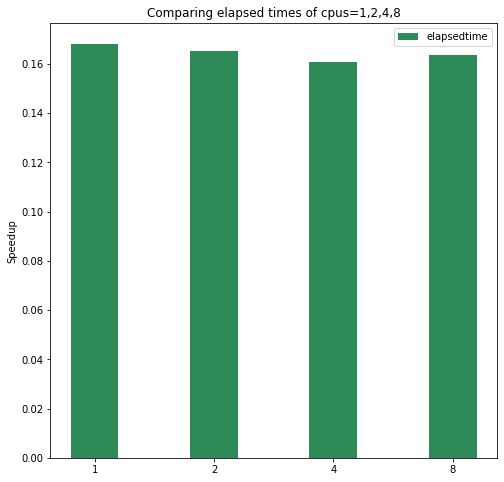

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt 
cpus = ['1','2','4','8']

# f1score=[logf1,cnbf1,knnf1,deepf1]
x_axis = np.arange(len(cpus))

# Multi bar Chart

plt.bar(x_axis, elapsedtime, width=0.4, label = 'elapsedtime',color='seagreen')
plt.xticks(x_axis, cpus)
# plt.xticks(x_axis, Algorithms)
plt.ylabel('Speedup')
plt.title('Comparing elapsed times of cpus=1,2,4,8')
# Add legend
plt.gcf().set_size_inches(8, 8)
plt.legend()

# Display

plt.show()
plt.savefig('/home/manapati.m/csye7105/hw3_moukthika_manapati/part2speedupbar.png')

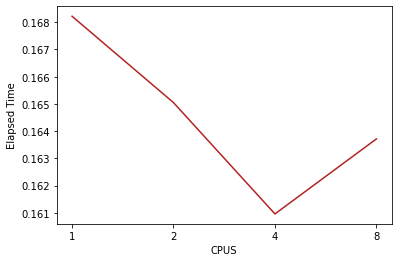

In [7]:
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
cpus = ['1','2','4','8']
fig = sns.lineplot(x=cpus, y=elapsedtime,color = 'firebrick')
fig.set(xlabel='CPUS', ylabel='Elapsed Time')
plt.savefig('/home/manapati.m/csye7105/hw3_moukthika_manapati/part2time.png')

In [8]:
# pip install plotly

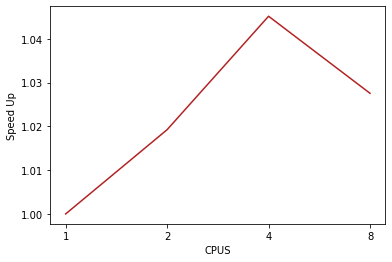

In [9]:
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
cpus = ['1','2','4','8']
fig = sns.lineplot(x=cpus, y=speedup,color = 'firebrick')
fig.set(xlabel='CPUS', ylabel='Speed Up')
plt.savefig('/home/manapati.m/csye7105/hw3_moukthika_manapati/part2speedup.png')